# Detalhes

| Variavel | Especificação | Tipo |
|:---:|:---:|:---:|
| gender | Se o cliente é homem ou mulher | object |
| SeniorCitizen | Se o cliente é idoso ou não (1, 0) | object |
| Partner | Se o cliente tem um parceiro ou não (Sim, Não) | int |
| Dependents | Se o cliente tem dependentes ou não (Sim, Não) | object |
| tenure | Número de meses que o cliente permaneceu na empresa | object |
| PhoneService | Se o cliente tem serviço telefônico ou não (Sim, Não) | int |
| MultipleLines | Se o cliente tem várias linhas ou não (Sim, Não, Nenhum serviço telefônico) | object |
| InternetService | Provedor de serviços de Internet do cliente (DSL, Fibra ótica, Não) | object |
| OnlineSecurity | Se o cliente tem segurança online ou não (Sim, Não, Nenhum serviço de internet) | object |
| OnlineBackup | Se o cliente tem backup online ou não (Sim, Não, Nenhum serviço de internet) | object |
| DeviceProtection | Se o cliente tem proteção do dispositivo ou não (Sim, Não, Nenhum serviço de internet) | object |
| TechSupport | Se o cliente tem suporte técnico ou não (Sim, Não, Nenhum serviço de internet) | object |
| StreamingTV | Se o cliente tem streaming de TV ou não (Sim, Não, Sem serviço de internet) | object |
| StreamingMovies | Se o cliente tem filmes em streaming ou não (Sim, Não, Sem serviço de internet) | object |
| Contract | O prazo do contrato do cliente (mês a mês, um ano, dois anos) | object |
| PaperlessBilling | Se o cliente tem fatura sem papel ou não (Sim, Não) | object |
| PaymentMethod | O método de pagamento do cliente (cheque eletrônico, cheque enviado pelo correio, transferência bancária | object |
| MonthlyCharges | O valor cobrado mensalmente ao cliente | float |
| TotalCharges | O valor total cobrado do cliente | object |
| Churn | Se o cliente cancelou ou não (Sim ou Não) | object |

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', None)

In [57]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(" ", pd.NA)
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [61]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [67]:
df_churn = df_churn.dropna()

In [69]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


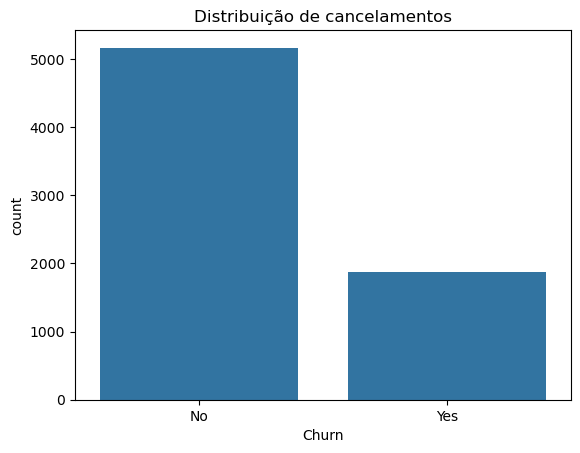

In [71]:
sns.countplot(x='Churn', data=df_churn)
plt.title('Distribuição de cancelamentos')
plt.show()

In [73]:
df_churn = df_churn.drop(columns=['customerID'])
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df_churn = pd.get_dummies(df_churn, drop_first=True).astype(int)
df_churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84,1990,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103,7362,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29,346,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74,306,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [81]:
y = df_churn['Churn_Yes']
X = df_churn.drop(['Churn_Yes'], axis=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_predi = modelo.predict(X_test)
y_predi

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.61      0.47      0.53       458

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [115]:
cm = confusion_matrix(y_test, y_predi)

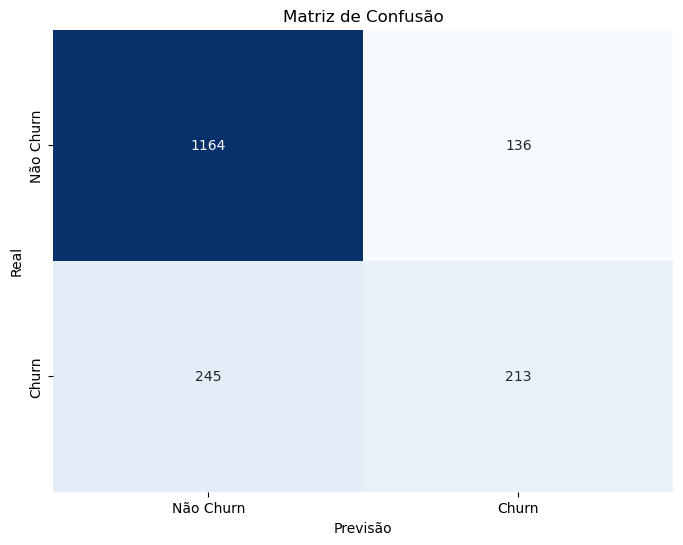

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Churn', 'Churn'], 
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

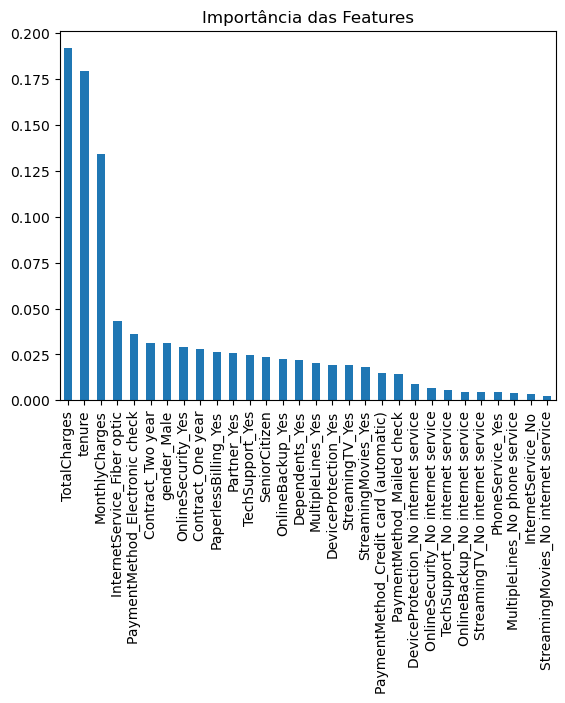

In [123]:
importances = modelo.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title('Importância das Features')
plt.show()